In [ ]:
'''Once we have our expression matrix, 
it will be examined to remove poor quality cells which were not 
detected in the initial processing of the raw reads.
Failure to remove these low quality cells at this stage may add technical
noise which has the potential to obscure he biological signals of
interest in the downstream analysis.

To perform QC I will be looking for cells which are outliers 
with respect to the rest of the dataset rather than comparing to 
independent quality standards. Consequently, care should be taken when
comparing quality metrics across datasets collected using different
 protocols. '''

In [1]:
import scanpy as sc #this package handles the AnnData
import pandas as pd #to handle Dataframes
import matplotlib.pyplot as plt #import matplotlib to visualize QC metrics

#a little magic incantation to allow matplotlib work in the jupyter notebook
%matplotlib inline  


In [2]:
#LOADING DATA
adata = sc.read('brain_raw.h5ad')

adata.obs.head()


,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


In [3]:
adata.var.head()


,ERCC
0610005C13Rik,False
0610007C21Rik,False
0610007L01Rik,False
0610007N19Rik,False
0610007P08Rik,False


In [ ]:
#COMPUTING CONTROL METRICS
'''  computing quality metrics and then filter cells and genes
accordingly.
The calculate_qc_metrics function returns two dataframes: one containing
quality control metrics about cells, and one containing metrics about 
genes. This function is housed in the 'preprocessing' portion of the 
SCANPY library.

calculate_qc_metrics when ['ERCC'] is inserted, 
it returns the information of both cells and 
genes with respect to Spike-ins'''

In [4]:
qc =sc.pp.calculate_qc_metrics(adata, qc_vars= ['ERCC'])
#THIS this returns a tuple of 
# (cell_qc_dataframe, gene_qc_dataframe)
# ask for the percentage of reads from spike ins

cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:')
cell_qc_dataframe.head()


This is the cell quality control dataframe:


,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_ERCC,log1p_total_counts_ERCC,pct_counts_ERCC
cell,,,,,,,,,,,
A1.B003290.3_38_F.1.1,3359,8.119696,390075.0,12.874097,25.884766,32.847017,42.219573,59.472666,10201.0,9.230339,2.615138
A1.B003728.3_56_F.1.1,1718,7.449498,776439.0,13.562474,43.051933,52.912721,65.313309,87.315423,67351.0,11.117688,8.674345
A1.MAA000560.3_10_M.1.1,3910,8.271548,1616087.0,14.295519,44.066006,51.514553,60.164211,74.451190,29870.0,10.304644,1.848292
A1.MAA000564.3_10_M.1.1,4352,8.378621,360004.0,12.793873,41.650926,48.958623,56.997422,69.736170,2592.0,7.860571,0.719992
A1.MAA000923.3_9_M.1.1,2248,7.718241,290282.0,12.578611,63.392494,69.136908,77.168753,90.522320,11002.0,9.305923,3.790107


“total_genes_by_counts”. Number of genes with positive counts in a cell. (total gene count having True ERCC)
“total_counts”. Total number of counts for a cell.
“pct_counts_in_top_50_genes”. Cumulative percentage of counts for 50 most expressed genes in a cell.
“total_counts_ercc”. Total number of counts for variabes in qc_vars.
“pct_counts_ercc”. Proportion of total counts for a cell which are ercc.
“total_counts”. Sum of counts for a gene.
“n_genes_by_counts”. The number of genes with at least 1 count in a cell. Calculated for all cells.
“mean_counts”. Mean expression over all cells.
“n_cells_by_counts”. Number of cells this expression is measured in.
“pct_dropout_by_counts”. Percentage of cells this feature does not appear in.

' PLot between lop1p_n_genes_by_counts(log(1+x) where x is count of unique \ngenes in a cell) and lop1p_total_counts(log(1+x) where x is the total count of \ngenes in a cell'

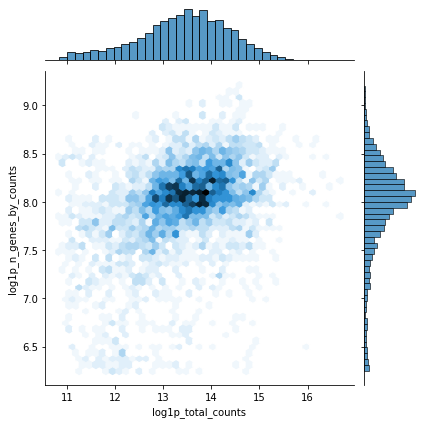

In [5]:
import seaborn as sns
sns.jointplot(
    data= cell_qc_dataframe,
    x='log1p_total_counts',
    y='log1p_n_genes_by_counts',
    kind='hex'
)

''' PLot between lop1p_n_genes_by_counts(log(1+x) where x is count of unique 
genes in a cell) and lop1p_total_counts(log(1+x) where x is the total count of 
genes in a cell'''




<AxesSubplot:xlabel='pct_counts_ERCC', ylabel='Count'>

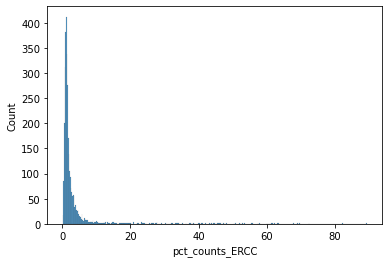

In [6]:
#Code below plots a bivariate histogram using hexagonal bins with marginal histograms.

sns.histplot(cell_qc_dataframe["pct_counts_ERCC"])

#Gives the histogram for pct_counts_ERCC - %genes in the cell which are ERCC


In [7]:
print('This is the gene quality control dataframe:')
gene_qc_dataframe.head()


This is the gene quality control dataframe:


,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
0610005C13Rik,28,0.118201,0.111721,99.176713,402.0,5.998937
0610007C21Rik,2399,206.211990,5.333742,29.461923,701327.0,13.460731
0610007L01Rik,961,35.938549,3.609256,71.743605,122227.0,11.713643
0610007N19Rik,272,6.498383,2.014687,92.002352,22101.0,10.003424
0610007P08Rik,582,16.328728,2.852366,82.887386,55534.0,10.924768


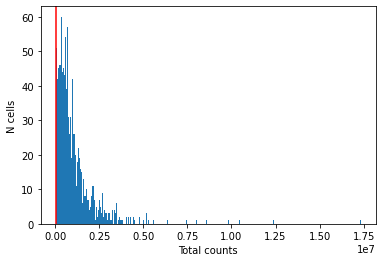

In [8]:
#Quality control for cells
'''First consider the total number of reads per cell.
Cells with few reads are likely to have been broken or failed to capture 
a cell andare thus removed '''

plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel("Total counts")
plt.ylabel('N cells')
plt.axvline(50000, color = 'red')

In [9]:
sum(cell_qc_dataframe['total_counts'] < 50000)

#this output indicates that the authors have already removed cells with fewer than 50,000 reads

0

Detected Genes
In addition to ensuring sufficient depth for each sample, it is neccessary to make sure reas are distributed across the transcriptome.
Thus, count the total number of genes detected in each sample.

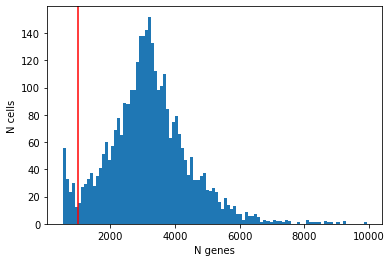

In [10]:
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(1000, color = 'red')


From the plot we conclude that most cells have between ~1,000-5,000 detected genes, which is typical for smartseq2 data. However, this varies by experimental protocol and sequencing depth.

The most notable feature in the above plot is the little peak on the left hand side of the distribution. If detection rates were equal across the cells then the distribution should be approximately normal. Thus, we will remove those cells in the tail of the distribution (fewer than ~1000 detected genes).

Spike-ins
Another measure of cell quality is the ratio between ERCC spike-in RNAs and endogenous RNAs. This ratio can be used to estimate the total amount of RNA in the captured cells.
Cells with a high level of spike-in RNAs had low starting amounts of RNA, likely due to the cell being dead or stressed which may result in the RNA being degraded.

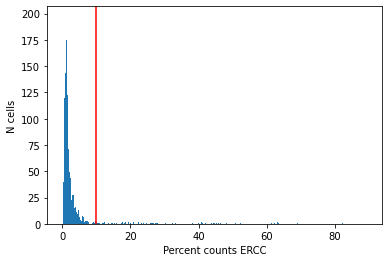

In [11]:
plt.hist(cell_qc_dataframe['pct_counts_ERCC'], bins = 1000)
plt.xlabel('Percent counts ERCC')
plt.ylabel('N cells')
plt.axvline(10, color = 'red')


#PLacing a threshold is always a judgement call. here,majority of cells have less
#than 10% ERCC counts, but there is a long tail of cells that have very high spike counts;
#these are likely dead cells and should be removed

Cell Filtering based on above analysis
There isn't an automatic function for removing cells with a high percentage of ERCC reads, but we can use a mask to remove them like so:

Removing cells having ERCC percentage count >= 10
Removing cell having gene count < 750

In [12]:
#Filter cells with fewer than 750 genes detected.
print('Started with: \n', adata)
sc.pp.filter_cells(adata, min_genes = 750)
print('Finished with: \n', adata)

Started with: 
 AnnData object with n_obs × n_vars = 3401 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'ERCC'
Finished with: 
 AnnData object with n_obs × n_vars = 3304 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'


Quality Control for Genes
It is typically a good idea to remove genes whose expression level is considered "undetectable".

We define a gene as detectable if at least two cells contain more than 5 reads from the gene. However, the threshold strongly depends on the sequencing depth.
It is important to keep in mind that genes must be filtered after cell filtering since some genes may only be detected in poor quality cells.
First, we consider the total number of cell in which a gene is deteted. Genes with few cell count are outliers and should thus be removed.

In [13]:
gene_qc_dataframe.head()

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
0610005C13Rik,28,0.118201,0.111721,99.176713,402.0,5.998937
0610007C21Rik,2399,206.211990,5.333742,29.461923,701327.0,13.460731
0610007L01Rik,961,35.938549,3.609256,71.743605,122227.0,11.713643
0610007N19Rik,272,6.498383,2.014687,92.002352,22101.0,10.003424
0610007P08Rik,582,16.328728,2.852366,82.887386,55534.0,10.924768


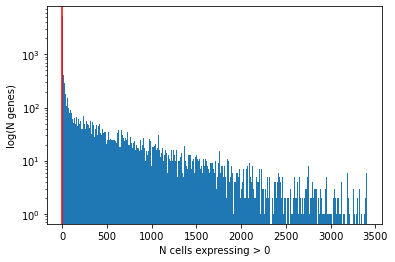

In [14]:
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins = 1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') #for clarity
plt.axvline(2, color = 'red')
plt.yscale('log')


In [15]:
xs = sum(gene_qc_dataframe['n_cells_by_counts'] < 2)

print('there are', xs, 'genes which have n_cells_by_counts <2')


there are 3969 genes which have n_cells_by_counts <2


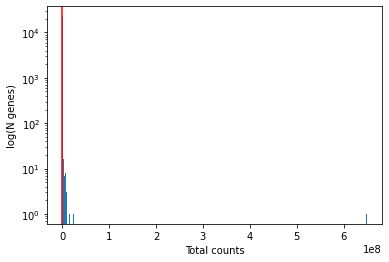

In [16]:
plt.hist(gene_qc_dataframe['total_counts'], bins = 1000)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)') #for clarity
plt.yscale('log')
plt.axvline(10, color = 'red')

In [17]:
qs = sum(gene_qc_dataframe['total_counts'] < 10)

print('there are', qs, 'genes which have sum_counts <10')


there are 4432 genes which have sum_counts <10


In [18]:
#Removal of Genes with few cell counts

print('Started with: \n', adata)
sc.pp.filter_genes(adata, min_cells = 2)
sc.pp.filter_genes(adata, min_counts = 10)
print('finished with: \n', adata)

#this will remove about 5k genes

Started with: 
 AnnData object with n_obs × n_vars = 3304 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'
finished with: 
 AnnData object with n_obs × n_vars = 3304 × 18661
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'


In [19]:
#Saving Quality Controlled Data

print(adata) #gives final dimensions of the QC'ed dataset
adata.write('brain_qc.h5ad')

!zip "brain_qc.zip" "/.brain_qc.h5ad"

AnnData object with n_obs × n_vars = 3304 × 18661
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'


'zip' is not recognized as an internal or external command,
operable program or batch file.


Summary
Calculated the quality control metrices across cells and genes.
Perfomed quality control in cells by removing cells with less total gene count, less unique genes and gaving more spike-ins.
Performed quality control in genes by removing genes which occur in less unique cells as well as those genes having less total cells.
Saving the quality controlled data for further pipeline.